**Project: Malignant and Benign Cancer Detection**

You have to implement binary classification algorithm. The tasks are given below. Everything must be implemented from scracth using only Python basics (such as loops, functions, and so on) and numpy arrays.

It is forbidden to use any ML libraries.


**Tasks:**

* Implement polynomial features [10p]
* Implement minmax normalisation [10p]
* Implement logistic regression loss function and gradient descent algorithm [10p]
* Plot learning and test curve [10p]
* Generate test prediction (test dataset) [10p]
* Fill the confusion matrix (test dataset) [10p]
* Compute F1 score, precision, recall and accuracy using confusion matrix (test dataset) [10p]
* Try various learning rate and compute F1 score of each learning rate (test dataset) [10p]
* Learning rates: (0.0001, 0.0005, 0.0007, 0.001, 0.005, 0.001, 0.01, 0.05, 0.09, 0.1, 0.4, 0.7) [10p]
* Generate the lists for each learning rate and its associated F1 score and plot (test dataset) [10p]

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
# read the data file
df = pd.read_csv('cancer_data.csv')
df.head() # diplay first 5 rows

# remove some of the columns because we don't need
df.drop('Unnamed: 32', inplace = True, axis = 1)
df.drop('id', inplace=True, axis=1)

# target output is a string, replace them to be integer values
df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0})
print(df.head())

print()

# display the columns' title
columns_title=list(df.columns)
print(columns_title)

# convert to numpy
data=df.to_numpy()

# split inputs and output data
data_in=data[:,1:] #input
data_out=data[:,0] #output (m,) vector

# print first 5 rows of outputs
print(data_out[:5])

# reshape data_out to match with the predicted output
data_out = np.reshape(data_out,(-1,1)) # dimension becomes (m,1)

# delete unnecesary variables to save some memory in Colab
del data, df

# display the shape of inputs and outputs
print(f"input dim:{data_in.shape}")
print(f"output dim:{data_out.shape}")

   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          

In [46]:
# split data into training and test sets

ratio = 0.7 # percentage of training dataset

len_tr = int(ratio*len(data_in)) # data_in.shape[0]

# training dataset
tr_data_in = data_in[:len_tr]
tr_data_out = data_out[:len_tr]

# test dataset
test_data_in = data_in[len_tr:]
test_data_out = data_out[len_tr:]

# display the shape of inputs and outputs
print(f"number of train data: {tr_data_in.shape}")
print(f"number of test data: {test_data_in.shape}")

number of train data: (398, 30)
number of test data: (171, 30)


In [47]:
# example of generating polynomial features manually:
# only two combinations: x[0]**2 and x[0]*x[1]

# training data
x0x0 = tr_data_in[:,0]**2
x0x1 = tr_data_in[:,0]*tr_data_in[:,1]

# convert vector to matrix
x0x0 = np.reshape(x0x0,(-1,1))
x0x1 = np.reshape(x0x1,(-1,1))

tr_data_in_poly=np.concatenate((tr_data_in,x0x0,x0x1),axis=1)

print(tr_data_in.shape)
print(tr_data_in_poly.shape)

# test data
x0x0 = test_data_in[:,0]**2
x0x1 = test_data_in[:,0]*test_data_in[:,1]

x0x0 = np.reshape(x0x0,(-1,1))
x0x1 = np.reshape(x0x1,(-1,1))

test_data_in_poly=np.concatenate((test_data_in,x0x0,x0x1),axis=1)

print(test_data_in.shape)
print(test_data_in_poly.shape)

(398, 30)
(398, 32)
(171, 30)
(171, 32)


In [48]:
#min_max NOrmalization
# normalise input data using min_max approach
# we use only train data to compute normalisation parameters

tr_min = np.min(tr_data_in_poly,axis=0)
tr_max = np.max(tr_data_in_poly,axis=0)
tr_range = tr_max-tr_min

#print(tr_min)
#print(tr_max)
#print(tr_range)

tr_data_in_norm = (tr_data_in_poly - tr_min)/tr_range
test_data_in_norm = (test_data_in_poly - tr_min)/tr_range

# display first 5 rows
print(tr_data_in_norm[:5])
print()


[[0.52103744 0.0226581  0.54598853 0.3640416  0.68000973 0.7920373
  0.70313964 0.73111332 0.66844634 0.60551811 0.35614702 0.12046941
  0.3690336  0.28198282 0.15929565 0.35139844 0.13568182 0.30062512
  0.31164518 0.18304244 0.69246032 0.14152452 0.75012578 0.56480227
  0.60113584 0.61929156 0.56861022 0.91202749 0.59846245 0.41886396
  0.37077387 0.1570435 ]
 [0.64314449 0.27257355 0.61578329 0.50201656 0.27047086 0.18176799
  0.20360825 0.34875746 0.34436733 0.14132266 0.15643672 0.08258929
  0.12444047 0.1289653  0.11938675 0.08132304 0.0469697  0.25383595
  0.08453875 0.0911101  0.67698413 0.30357143 0.60590307 0.54539855
  0.34755332 0.15456336 0.19297125 0.63917526 0.23358959 0.22287813
  0.50495209 0.45902047]
 [0.60149557 0.3902604  0.59574321 0.44979834 0.57294075 0.4310165
  0.46251172 0.63568588 0.48158035 0.21124684 0.22962158 0.09430251
  0.18037035 0.16745117 0.15083115 0.2839547  0.09676768 0.38984656
  0.20569032 0.12700551 0.62063492 0.36007463 0.5706859  0.46932364


In [49]:
#Graident descent algortihm
max_epoch = 10000
tr_err = [] # store train error in each epoch
test_err = [] # store train error in each epoch
w = np.zeros((1,tr_data_in_norm.shape[1]),dtype=float) # initial parameters
b = 0. # initial bias term
lr = 0.05
m = len(tr_data_in_norm)

def sigmoid(x): #function for sigmoid formula
    return 1 / (1 + np.exp(-x))

# ...

for epoch in range(max_epoch):

    # Compute model prediction on train set
    a = np.matmul(tr_data_in_norm, w.T) + b
    ypred = sigmoid(a)
    e = -(1/m) * np.sum(tr_data_out * np.log(ypred+1e-6) + (1 - tr_data_out) * np.log((1 - ypred)+1e-6), axis=0)
    tr_err.append(e.squeeze())  # append e to tr_err

    # Compute model prediction on test set
    a_test = np.matmul(test_data_in_norm, w.T) + b
    ypred_test = sigmoid(a_test)
    e_test = -1 * np.mean(test_data_out * np.log(ypred_test+1e-6) + (1 - test_data_out) * np.log((1 - ypred_test)+1e-6), axis=0)
    test_err.append(e_test.squeeze())  # append e_test to test_err

    # Gradient descent to update weights and bias
    dw = np.matmul((ypred - tr_data_out).T, tr_data_in_norm) / m
    db = np.sum(ypred - tr_data_out) / m

    w = w - lr * dw
    b = b - lr * db

    if(epoch%1000 == 0):
      print(f"epoch {epoch}/{max_epoch}  Loss(train): {tr_err[-1]:.4f}  Loss(test): {test_err[-1]:.4f}")





epoch 0/10000  Loss(train): 0.6931  Loss(test): 0.6931
epoch 1000/10000  Loss(train): 0.2773  Loss(test): 0.2921
epoch 2000/10000  Loss(train): 0.2101  Loss(test): 0.2263
epoch 3000/10000  Loss(train): 0.1796  Loss(test): 0.1974
epoch 4000/10000  Loss(train): 0.1613  Loss(test): 0.1802
epoch 5000/10000  Loss(train): 0.1487  Loss(test): 0.1686
epoch 6000/10000  Loss(train): 0.1394  Loss(test): 0.1600
epoch 7000/10000  Loss(train): 0.1321  Loss(test): 0.1534
epoch 8000/10000  Loss(train): 0.1262  Loss(test): 0.1480
epoch 9000/10000  Loss(train): 0.1213  Loss(test): 0.1436


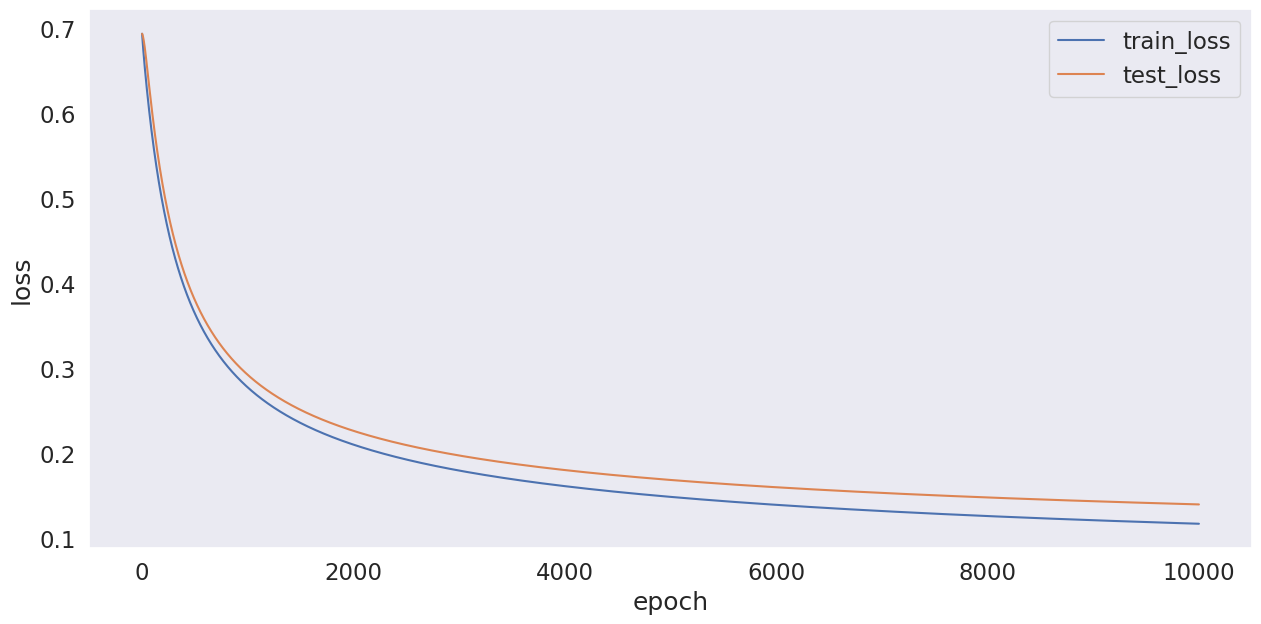

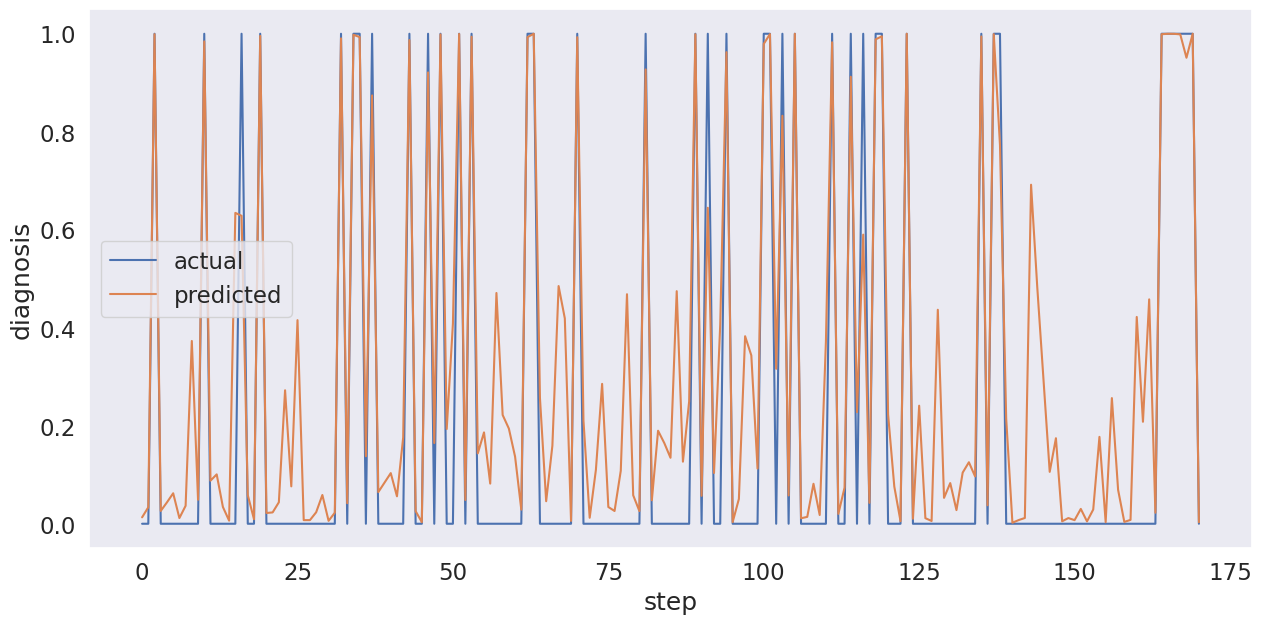

In [50]:
#plotting error curve
import matplotlib.pyplot as plt

plt.figure(figsize = (15,7))
plt.plot(tr_err,label="train_loss")
plt.plot(test_err,label="test_loss")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize = (15,7))
plt.plot(test_data_out, label="actual")
plt.plot(ypred_test, label="predicted")
plt.xlabel('step')
plt.ylabel('diagnosis')
plt.grid()
plt.legend()
plt.show()


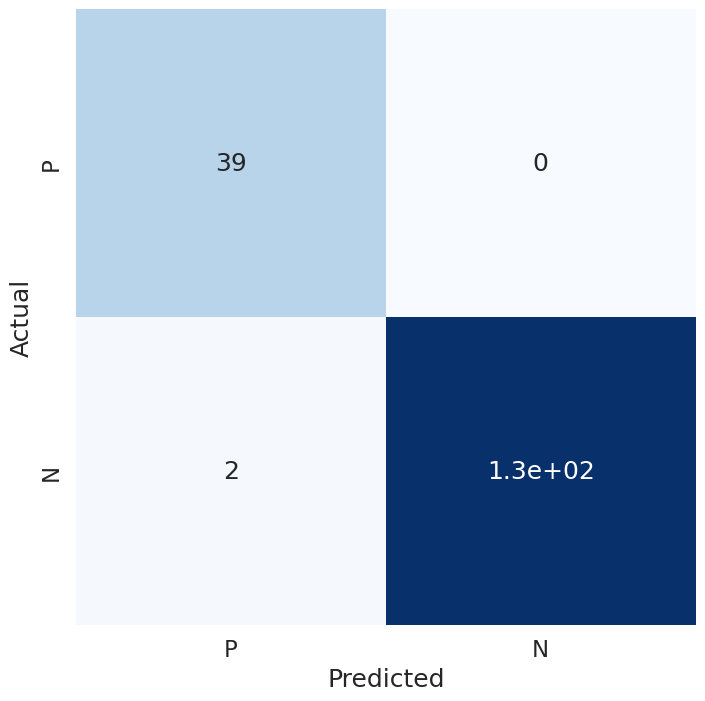

[[ 39   0]
 [  2 130]]


In [51]:

# helper function to plot confusion matrix

def plot_conf_mat(conf_mat):
    class_label=["P","N"]
    plt.subplots(figsize=(8, 8))
    sns.set(font_scale=1.5) # Adjust the font to fit
    sns.heatmap(conf_mat,
                annot=True,
                cbar=False,
                xticklabels=class_label,
                yticklabels=class_label,
                cmap='Blues')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()


def calculate_confusion_matrix(actual, predicted):
    # Initialize confusion matrix
    conf_mat = np.zeros((2, 2), dtype=int)

    # Update confusion matrix
    for a, p in zip(actual, predicted):
      if(a==1):
        if(p==1):
          conf_mat[0, 0] += 1
        else:
          conf_mat[0, 1] += 1
      elif(a==0):
        if(p==1):
          conf_mat[1, 0] += 1
        else:
          conf_mat[1, 1] += 1

    return conf_mat

# Update predictions on the test set
ypred_test = sigmoid(np.matmul(test_data_in_norm, w.T) + b)
ypred_test_binary = np.round(ypred_test)

# Calculate the confusion matrix for the test set
confusion_matrix_test = calculate_confusion_matrix(test_data_out, ypred_test_binary)

# Print the confusion matrix for the test set
plot_conf_mat(confusion_matrix_test)
print(confusion_matrix_test)

In [52]:
#Values
TP = confusion_matrix_test[0,0]
FN = confusion_matrix_test[0,1]
FP = confusion_matrix_test[1,0]
TN = confusion_matrix_test[1,1]

Accuracy = (TP + TN) / (TP + TN + FP + FN)
Precision = (TP) / (TP + FP)
Recall = (TP) / (TP + FN)
F1Score = 2 * ( (Precision * Recall) / (Precision + Recall) )

print(f"Accuracy: {Accuracy:.4f}")
print(f"Precision: {Precision:.4f}")
print(f"Recall: {Recall:.4f}")
print(f"F1Score: {F1Score:.4f}")


Accuracy: 0.9883
Precision: 0.9512
Recall: 1.0000
F1Score: 0.9750


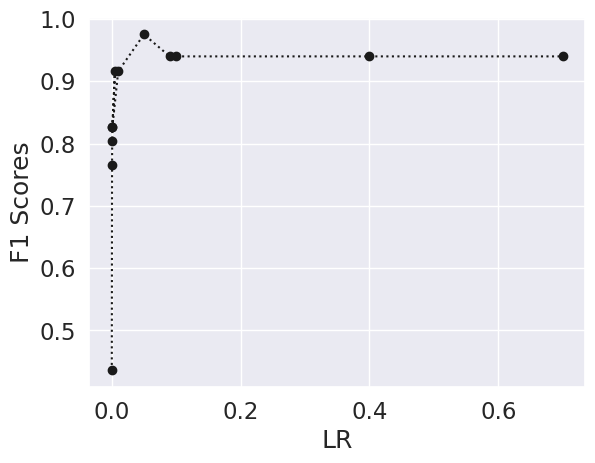

In [53]:
# test each learning rate and obtained F1 score for each one,
# do experiments one by one and fill the F1 scores manually
# use test dataset

LR = [0.0001, 0.0005, 0.0007, 0.001, 0.005, 0.001, 0.01, 0.05, 0.09, 0.1, 0.4, 0.7]
# you need to update F1_score_list
F1_score_list = [0.4358,0.7647,0.8041,0.8261,0.9157,0.8261,0.9157,0.9750,0.9398,0.9398,0.9398,0.9398]

plt.plot(LR, F1_score_list, 'o:k')
plt.xlabel("LR")
plt.ylabel("F1 Scores")
plt.show()